In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import pprint

import folium
from folium.plugins import MarkerCluster
import googlemaps
import geopandas as gpd

import requests
import json
import time

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 중구지도 버스 총 이용률

junggu_geo = gpd.read_file('./datasets/junggu_geo.geojson')
bus_3month_dong_tot = pd.read_csv('./datasets/bus_3month_dong_tot.csv')

here = [37.560914, 126.990202]
m = folium.Map(location=here, tiles="OpenStreetMap", zoom_start=14)

folium.GeoJson(junggu_geo).add_to(m)

m.choropleth(
    geo_data=junggu_geo,
    data=bus_3month_dong_tot,
    columns=['dong_id', 'guest_cnt'],
    key_on='feature.properties.adm_cd')
m

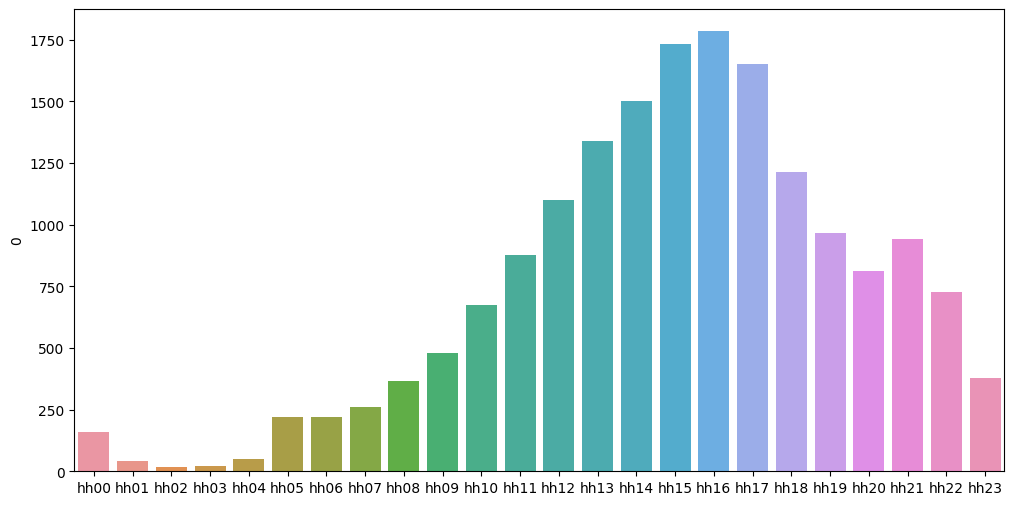

In [5]:
# 3월1일의 24시간 그래프

bus = pd.read_csv('./datasets/bus.csv')
bus_3month = bus[(bus['dong_id']//100==11020)&(bus['mm']==3)].sort_values(['busdate'])

plt.figure(figsize=(12,6))
며칠 = 1
동 = 1102054
bus_mm03_dd01_1102054 = bus_3month[(bus_3month['dd']==며칠)&(bus_3month['dong_id']==동)]
bus_mm03_dd01_1102054
time_list = bus_mm03_dd01_1102054.iloc[0, 6:]
dd= pd.DataFrame(time_list.values, index=time_list.index)
# plt.ylim(0,3000)
sns.barplot(dd, x=dd.index, y=dd[0])
plt.show()